### Importing Libraries

NumPy is a package in Python used for Scientific Computing. NumPy package is used to perform different operations.  
Pandas is used for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.
Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.  
Sklearn is a simple and efficient tool for data mining and data analysis built on numpy, scipy and matplotlib.

In [218]:
import numpy as np                      
import pandas as pd                     
import matplotlib.pyplot as plt

from sklearn import preprocessing;
from sklearn import cross_validation;
from sklearn import linear_model;

### Importing OS module

It provides a way of using operating system dependent functionality. The functions that the OS module provides allows you to interface with the underlying operating system that Python is running on – be that Windows, Mac or Linux.

In [3]:
import os
a = os.listdir("/Users/rounakbose/Git Local/SMP-Methodology-master/SMP_Datasets")
print (a)

['fundamentals.csv', 'prices.csv', 'retail_sales.csv', 'Drive-link-for-Prices-csv', 'securities.csv', 'SP500.csv']


### Reading the CSV file

1. Load the CSV file of the dataset using the filepath, setting the DATE column as Index, so as to prevent complications observed during plotting.  
2. Plot the existing dataset, to visualise the dataset.

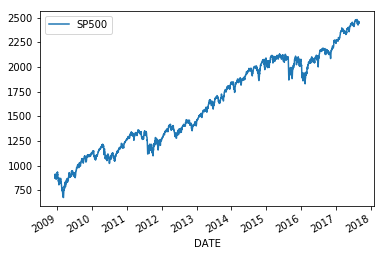

In [4]:
df1 = pd.read_csv("/Users/rounakbose/Git Local/SMP-Methodology-master/SMP_Datasets/SP500.csv", index_col='DATE', parse_dates=True) 
df1.plot()

### Tabularising the CSV file

We have 2198 values of 'DATE' and the corresponding price of the 'SP500' stock.

In [7]:
df = pd.read_csv("/Users/rounakbose/Git Local/SMP-Methodology-master/SMP_Datasets/SP500.csv") 
print(df.head(), '\n', '.', '\n', '.', '\n', '.')
print(df.tail())

#print('\nMethod 1:')
#df1 = df.iloc[:, 0:1]
#df1 = df.iloc[:,0:2]
#print('\n', df1.tail())
#print('\nMethod 2:')
#df2 = df.drop('SP500', axis=1)
#print('\n', df2.tail())

         DATE    SP500
0  2017-08-30  2457.59
1  2017-08-29  2446.30
2  2017-08-28  2444.24
3  2017-08-25  2443.05
4  2017-08-24  2438.97 
 . 
 . 
 .
            DATE   SP500
2193  2008-12-12  879.73
2194  2008-12-11  873.59
2195  2008-12-10  899.24
2196  2008-12-09  888.67
2197  2008-12-08  909.70


### Setting initial requirements

1. Selecting the column on which we want to make the forecast.  
2. Choosing the range till which we want to make the forecast.  
3. Choosing the size (in %) of the test set.  

Note: According to the dataset, there are approximately 252 values for one full year of SP500 data.

In [9]:
forecast_col = 'SP500'                       
forecast_out = 120
test_size = 0.1;

### Defining the prepare_data() function

#### Feature Engineering
Step 1: Create new column called label with the last 5 rows as NaN.  
Step 2: Create the feature array.  
Step 3: Preprocess the feature array through feature scaling.  
Step 4: Create the separate column to use in the predicting, later on.  
Step 5: Create X, that will have the training and the testing data.  
Step 6: Then drop the NA values assigned earlier.  
Step 7: Assign the new column, label, to Y.

#### Cross Validation
Step 8: Run the cross_validation.train_test_split() on the engineered features according to the specified test_size

In [10]:
def prepare_data(df, forecast_col, forecast_out, test_size):
    
    label = df[forecast_col].shift(-forecast_out);
    X = np.array(df[[forecast_col]]);             
    X = preprocessing.scale(X)                    
    X_lately = X[-forecast_out:]                  
    X = X[:-forecast_out]                         
    label.dropna(inplace=True);                   
    y = np.array(label)
    
    X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, y, test_size=test_size) 

    response = [X_train, X_test, Y_train, Y_test, X_lately];
    return response;

### Calling prepare_data() for Feature Engineering and Cross Validation

In [59]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size);

### Defining the Regression models

## 1. Linear Regression

Initialise and train the Linear Regression model on the training data.  
Test the score of the model by evaluating on the test data.  

Calculate the predicted dataset and store the array.

In [60]:
learner = linear_model.LinearRegression();         

learner.fit(X_train,Y_train);  
score=learner.score(X_test,Y_test); 
lin_reg = score

forecast= learner.predict(X_lately);

### Visualising the predicted data

Visualise the predicted dataset of stock prices.  
Visualise the accuracy of the Linear regression model.

In [61]:
response={};
response['test_score']=score; 

print(response, '\n');

response['forecast_set']=forecast;

print(response);
#print('\n', type(response))

{'test_score': 0.936747975549684} 

{'test_score': 0.936747975549684, 'forecast_set': array([874.85711171, 851.87601225, 839.95450637, 826.61907698,
       843.34404907, 820.75032591, 822.03835214, 836.70054539,
       841.21347937, 842.74361579, 816.76034994, 826.62876138,
       817.76752834, 841.42653634, 842.28844863, 861.64757961,
       840.4968332 , 852.25370415, 837.02013084, 840.35156709,
       811.56950742, 807.00815139, 807.81195723, 789.91517181,
       792.19100761, 800.63581113, 786.77742371, 778.67157447,
       784.9954927 , 767.86377548, 803.89945652, 799.73516121,
       786.91300542, 776.68627089, 793.37250535, 791.27098888,
       760.86194872, 751.55523292, 770.85625746, 777.65471166,
       769.79097261, 747.22630268, 734.43320011, 724.41952255,
       751.93292482, 768.31894264, 749.93793683, 742.42283646,
       758.69264139, 706.02883234, 721.03966427, 731.0242886 ,
       715.30649491, 691.84117506, 694.41722751, 688.79058664,
       660.33779683, 658.6333410

## 2. Ridge Regression

Initialise and train the Ridge Regression model on the training data.  
Test the score of the model by evaluating on the test data.  

Calculate the predicted dataset and store the array.

Visualise the predicted dataset of stock prices.  
Visualise the accuracy of the Linear regression model.

In [65]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size);

learner = linear_model.Ridge();

learner.fit(X_train,Y_train);   
score=learner.score(X_test,Y_test);
ridge_reg = score

forecast= learner.predict(X_lately);

response={};
response['test_score']=score; 

print(response, '\n');

response['forecast_set']=forecast;

print(response);

{'test_score': 0.9474807086816863} 

{'test_score': 0.9474807086816863, 'forecast_set': array([875.50038536, 852.56016308, 840.65986235, 827.34815309,
       844.04337596, 821.48984096, 822.77557613, 837.41168929,
       841.91659598, 843.4440107 , 817.50696208, 827.35782028,
       818.51234898, 842.12927398, 842.98965315, 862.31434946,
       841.20122453, 852.93718317, 837.73070629, 841.05621681,
       812.32535266, 807.77211006, 808.57448615, 790.70953429,
       792.981322  , 801.41110448, 787.5773674 , 779.48593628,
       785.79860596, 768.69736146, 804.66894472, 800.51205657,
       787.71270795, 777.50416403, 794.16071817, 792.06293973,
       761.70798906, 752.4178274 , 771.68452062, 778.4708822 ,
       770.62113062, 748.09659716, 735.32625008, 725.33038416,
       752.79484749, 769.151719  , 750.80340805, 743.30167502,
       759.54254035, 706.97240603, 721.95653773, 731.92340211,
       716.23356614, 692.80998477, 695.38145512, 689.76482252,
       661.36264256, 659.66121

## 3. Bayesian-Ridge Regression

Initialise and train the Bayesian-Ridge Regression model on the training data.  
Test the score of the model by evaluating on the test data.  

Calculate the predicted dataset and store the array.

Visualise the predicted dataset of stock prices.   
Visualise the accuracy of the Linear regression model.

In [71]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size);

learner = linear_model.BayesianRidge(); 

learner.fit(X_train,Y_train);  
score=learner.score(X_test,Y_test); 
bayesianridge_reg = score;

forecast= learner.predict(X_lately);

response={};
response['test_score']=score; 

print(response, '\n');

response['forecast_set']=forecast;

print(response);

{'test_score': 0.9545439315539958} 

{'test_score': 0.9545439315539958, 'forecast_set': array([877.94667821, 855.04428392, 843.16360656, 829.87384805,
       846.54154082, 824.02519616, 825.30881118, 839.92078967,
       844.41826786, 845.94316389, 820.04888497, 829.88349929,
       821.05261401, 844.63059515, 845.48955558, 864.78238583,
       843.70407604, 855.42068231, 840.23928061, 843.55930743,
       814.87581993, 810.33008554, 811.13113852, 793.29564563,
       795.5636872 , 803.97956913, 790.16864362, 782.09055512,
       788.39281533, 771.31977045, 807.23203726, 803.08200374,
       790.30376099, 780.11205077, 796.74113857, 794.64681933,
       764.34192339, 755.06708103, 774.30200384, 781.07717484,
       773.24036736, 750.75297642, 738.00368739, 728.02430446,
       755.44347942, 771.77337876, 753.45532383, 745.96596101,
       762.18004546, 709.69659829, 724.65602144, 734.60645065,
       718.94248692, 695.55753059, 698.12476063, 692.51738976,
       664.16204445, 662.46342

## 4. Lasso Regression

Initialise and train the Lasso Regression model on the training data.  
Test the score of the model by evaluating on the test data.  

Calculate the predicted dataset and store the array.

Visualise the predicted dataset of stock prices.  
Visualise the accuracy of the Linear regression model.

In [82]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size);

learner = linear_model.Lasso(alpha=0.1);

learner.fit(X_train,Y_train);  
score=learner.score(X_test,Y_test); 
lasso_reg = score

forecast= learner.predict(X_lately);

response={};
response['test_score']=score; 

print(response, '\n');

response['forecast_set']=forecast;

print(response);

{'test_score': 0.9568207062764479} 

{'test_score': 0.9568207062764479, 'forecast_set': array([880.80781478, 857.97007397, 846.12293577, 832.87069426,
       849.49133412, 827.03855312, 828.31854449, 842.88927335,
       847.37405516, 848.89464641, 823.07346706, 832.88031825,
       824.07436257, 847.58578305, 848.44231863, 867.68068521,
       846.66187951, 858.34540978, 843.2068652 , 846.51751958,
       817.91500558, 813.3821038 , 814.18089541, 796.39575212,
       798.65739101, 807.0495149 , 793.27757765, 785.22229359,
       791.50676252, 774.48191485, 810.29280132, 806.15448334,
       793.41231358, 783.24937456, 799.83151844, 797.74311146,
       767.52376626, 758.27510679, 777.4557294 , 784.21177409,
       776.39708992, 753.9731809 , 741.25988312, 731.308672  ,
       758.65044261, 774.93424263, 756.66789958, 749.19967924,
       765.36799132, 713.03270495, 727.94989764, 737.87223678,
       722.25249243, 698.93355185, 701.4935346 , 695.90199334,
       667.62669518, 665.93287

### Comparative Study

Comparing the prediction scores of the models on the same dataset, when using:  
1. Linear Regression model.  
2. Ridge Regression model.  
3. Bayesian Ridge Regression model.  
4. Lasso Regression model.

In [85]:
print('Linear Regression model score:\n', lin_reg)
print('Ridge Regression model score:\n', ridge_reg)
print('Bayesian Ridge Regression model score:\n', bayesianridge_reg)
print('Lasso Regression model score:\n', lasso_reg)

Linear Regression model score:
 0.936747975549684
Ridge Regression model score:
 0.9474807086816863
Bayesian Ridge Regression model score:
 0.9545439315539958
Lasso Regression model score:
 0.9568207062764479


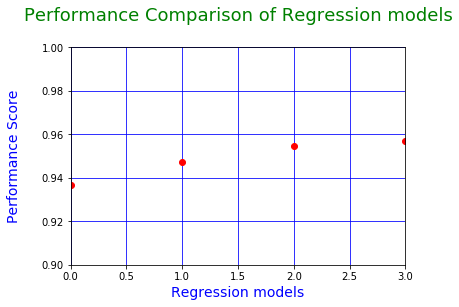

In [217]:
plt.plot([lin_reg, ridge_reg, bayesianridge_reg, lasso_reg], 'ro')
plt.axis([0, 3, 0.9, 1])
plt.grid(True, color='blue')
plt.xlabel('Regression models', fontsize=14, color='blue')
plt.ylabel('Performance Score\n', fontsize=14, color='blue')
plt.title('Performance Comparison of Regression models\n', fontsize=18, color='green')
plt.show()

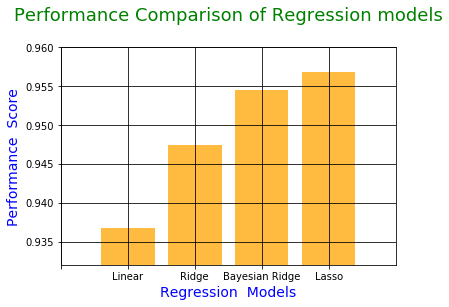

In [212]:
objects = ('', 'Linear', 'Ridge', 'Bayesian Ridge', 'Lasso')
y_pos = np.arange(len(objects))
performance = [0, lin_reg, ridge_reg, bayesianridge_reg, lasso_reg]
 
plt.bar(y_pos, performance, align='center', alpha=0.75, color='orange', width=0.8)
plt.axis([1, 5, 0.932, 0.96])
plt.grid(True, color='black')
plt.xticks(y_pos, objects, fontsize=10)
plt.xlabel('Regression  Models', fontsize=14, color='blue')
plt.ylabel('Performance  Score', fontsize=14, color='blue')
plt.title('Performance Comparison of Regression models\n', fontsize=18, color='green') 
plt.show()

### Conclusion

From the comparative study done here, we can conclude that Linear Regression will perform with the least accuracy compared to the other models tested here.  
Lasso Regression and Bayesian Ridge Regression are almost neck-to-neck with respect to the performance score.  
Ridge Regression does work better than Linear Regression, but not as good as Bayesian Ridge Regression, or Lasso regression.

#### For long-term stock market predictions, Lasso Regression turned out to perform the best with accuracy nearing 96%.

There is, nonetheless, huge scope for improvement.